## Forecast Stock Prices

### **A Regression Project Using XGBoost to forecast stock prices based on historical dataset from yfinance**

In this project we did the following:
- We collect data by downloding the historical dataset price from Yahoo finance.
- Data preprocessing, by cleaning, transforming and enconding features. Spliting the dataset into training and test sets.
- We train an XGBoost regression model on the training data. Tune hyperparameters using grid search techniques to find the optimal model parameters.
- We print the best optimal parameters for the model
- We evaluate the trained model's performance on both the training and testing datasets using metrics such as Mean squared error (MSE) root mean squared error (RMSE), and R-squared (R2) score. Afterward we analyze the bias-variance tradeoff to ensure the model generalizes well to unseen data.
- We visualize the model's predictions against the actual stock prices to assess its accuracy and identify any patterns or trends.



[*********************100%%**********************]  1 of 1 completed


Optimal Parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Set:
Root Mean Squared Error (RMSE): 0.27394162980960884
R-squared (R2) Score: 0.9998376790769965

Testing Set:
Root Mean Squared Error (RMSE): 0.7022113152994446
R-squared (R2) Score: 0.998891397082692


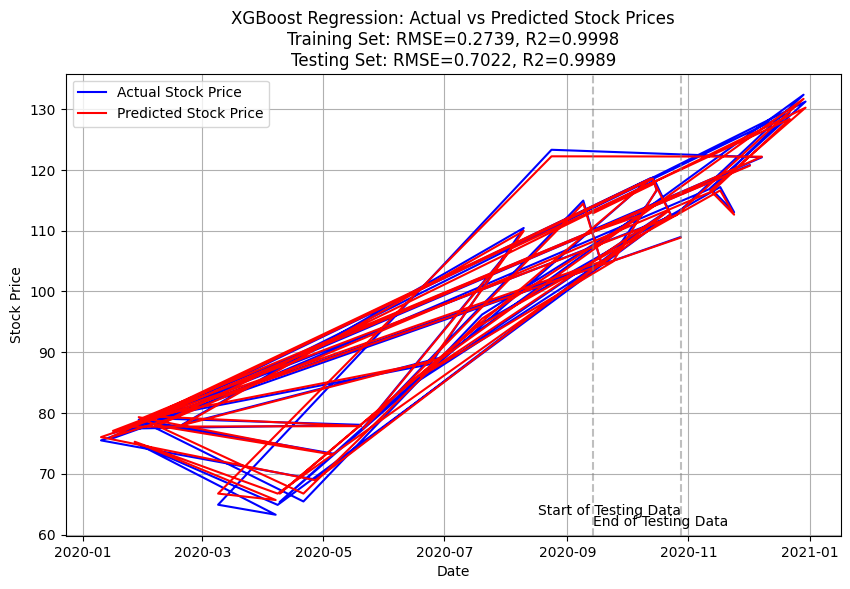

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Download historical stock price dataset
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = download_stock_data(ticker, start_date, end_date)

# Data Preprocessing
def preprocess_data(data):

    data.dropna(inplace=True)# Drop missing values
    # Extract features and target variable
    X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = data['Adj Close']
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(stock_data)

# XGBosost Model Training
def train_xgboost_model(X_train, y_train):
    # regressor
    xgb_regressor = XGBRegressor(objective='reg:squarederror')
    # Define hyperparameters grid for tuning
    params_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=params_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    # Print optimal parameters
    print("Optimal Parameters:")
    print(grid_search.best_params_)
    return best_model

best_xgb_model = train_xgboost_model(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    return train_rmse, test_rmse, train_r2, test_r2

train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test)
print("Training Set:")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"R-squared (R2) Score: {train_r2}")
print("\nTesting Set:")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R-squared (R2) Score: {test_r2}")

def visualize_predictions(model, X_test, y_test, train_rmse, test_rmse, train_r2, test_r2):
    test_pred = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Stock Price', color='blue')
    plt.plot(y_test.index, test_pred, label='Predicted Stock Price', color='red')
    plt.title(f'XGBoost Regression: Actual vs Predicted Stock Prices\n'
              f'Training Set: RMSE={train_rmse:.4f}, R2={train_r2:.4f}\n'
              f'Testing Set: RMSE={test_rmse:.4f}, R2={test_r2:.4f}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.axvline(x=y_test.index[0], color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=y_test.index[-1], color='gray', linestyle='--', alpha=0.5)
    plt.text(y_test.index[0], y_test.min(), 'Start of Testing Data', horizontalalignment='right')
    plt.text(y_test.index[-1], y_test.min(), 'End of Testing Data', verticalalignment='top')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_predictions(best_xgb_model, X_test, y_test, train_rmse, test_rmse, train_r2, test_r2)


> As indicated by the model's high R-squared score and low RMSE on the `training set`, the training data are well fitted to the model, suggesting low bias.

> However, in contrast with the training set, the higher root mean square error (RMSE) and marginally lower R-squared value on the `testing set` suggest that the model might encounter variance in its ability to generalize to new, unobserved data.

> To enhance the generalization performance of the model, various techniques can be contemplated, including hyperparameter tuning, regularization, and data collection that is more diverse in nature. It is critical to strike a balance between variance and bias in order to guarantee that the model can generalize effectively to unobserved data.